# Preliminaries and Enter Your Ticker Here!

In [27]:
import numpy as np
import pandas as pd

symbol = 'FB'

## Leading Indicators Prices

In [9]:
from iexfinance.stocks import Stock

indicators = ['SPY', 'QQQ']
batch = Stock( indicators )
batch.get_price()

{'QQQ': 167.45, 'SPY': 270.06}

In [22]:
quotes = batch.get_quote()
DisplayDict = {
    'Last': 'latestPrice',
    '% Change': 'changePercent'
}

for sym in indicators:
    print(f'---{sym}---')
    for display in DisplayDict:
        print( f'{display}: {quotes[sym][DisplayDict[display]]}')

---SPY---
Last: 270.06
% Change: 0.00048
---QQQ---
Last: 167.45
% Change: -0.00422


## Stock Description

In [28]:
from iexfinance.stocks import Stock

myStock = Stock(symbol)

In [29]:
info = myStock.get_company()
lKeyInfo = ['companyName', 'description', 'exchange']

print('--- Company Description ---')
for key in lKeyInfo:
    print(f'{key}: {info[key]}')

--- Company Description ---
companyName: Facebook Inc.
description: Facebook Inc is the world's largest online social network. Its products are Facebook, Instagram, Messenger, WhatsApp, and Oculus. Its products enable people to connect and share through mobile devices and personal computers.
exchange: Nasdaq Global Select


In [30]:
stats = myStock.get_key_stats()
lKeyStats = [ 'beta', 'dividendRate', 'exDividendDate',
            'priceToBook', 'priceToSales', 'sharesOutstanding',
            'week52high', 'week52low']

print('--- Key Stats ---')
for key in lKeyStats:
    print( f'{key}: {stats[key]}')

--- Key Stats ---
beta: 0.913787
dividendRate: 0
exDividendDate: 0
priceToBook: 5.62
priceToSales: 8.604919
sharesOutstanding: 2853989800
week52high: 218.62
week52low: 123.02


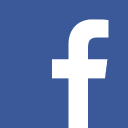

In [31]:
logo = myStock.get_logo()

from IPython.display import Image
Image(logo['url'])

## Market Book
**Need to be tested during market hours**

In [32]:
book = myStock.get_book()

def PrintBidAsk(quote_dict):
    if not quote_dict['bids'] or not quote_dict['asks']:
        data = quote_dict['quote']
        for side in ['Bid', 'Ask']:
            price = data[f'iex{side}Price']
            size = data[f'iex{side}Size']
            
            print(f'Last {side}: {price} x {size}')
        
        print(f'Updated at: {data["iexLastUpdated"]}')
    
    else:   # Show Live Bid Ask
        for side in ['Bid', 'Ask']:
            price = quote_dict[side][0]['price']
            size = quote_dict[side][0]['size']
            
            print(f'{side}: {price} x {size}')

In [33]:
PrintBidAsk(book)

Last Bid: None x None
Last Ask: None x None
Updated at: None


## Intraday Time Series Tick Data for Consecutive Dates
### Work-in-Progress...